# Data Undetstanding

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('/Users/xiaoming/Library/CloudStorage/OneDrive-AsiaPacificUniversity/Degree Y3S2/FYP/retail_store_inventory.csv')

##### NORMAL  INFORMATION (ROW+COLUMN AMOUNTS AND ATTRIBUTES DATA TYPES)

In [5]:
print("ROW, COLUMNS: \n", df.shape)
print("\nATTRIBUTES DATA TYPES: \n", df.dtypes)


ROW, COLUMNS: 
 (73100, 15)

ATTRIBUTES DATA TYPES: 
 Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object


##### NORMAL DATA INFORMATION (NULL AND DUPLICATES)

In [6]:
print("\nMISSING DATA: \n",df.isnull().sum())
print("\nDUPLICATES DATA: ",df.duplicated().sum())



MISSING DATA: 
 Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64

DUPLICATES DATA:  0


##### TOTAL UNIQUE VALUE FOR CATEGORY COLUMNS

In [7]:
print("UNIQUE VALUE:")
for col in ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']:
    print(f"{col}: {df[col].nunique()} unique values")

UNIQUE VALUE:
Store ID: 5 unique values
Product ID: 20 unique values
Category: 5 unique values
Region: 4 unique values
Weather Condition: 4 unique values
Seasonality: 4 unique values


##### RANGE OF NUMERIC ATTRIBUTES

In [8]:
num_cols = ['Inventory Level', 'Units Sold', 'Units Ordered',
            'Demand Forecast', 'Price', 'Discount', 'Competitor Pricing',]
print("\nNumerical Columns Stats:")
print(df[num_cols].describe())


Numerical Columns Stats:
       Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Competitor Pricing  
count  73100.000000  73100.000000        73100.000000  
mean      55.135108     10.009508           55.146077  
std       26.021945      7.083746           26.191408  
min       10.000000      0.000000            5.030000  
25%       32.650000      5.000000           3

In [9]:
print(df.head())

         Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1           

In [10]:
df["Date"] = pd.to_datetime(df["Date"])
print(df.dtypes)

Date                  datetime64[ns]
Store ID                      object
Product ID                    object
Category                      object
Region                        object
Inventory Level                int64
Units Sold                     int64
Units Ordered                  int64
Demand Forecast              float64
Price                        float64
Discount                       int64
Weather Condition             object
Holiday/Promotion              int64
Competitor Pricing           float64
Seasonality                   object
dtype: object


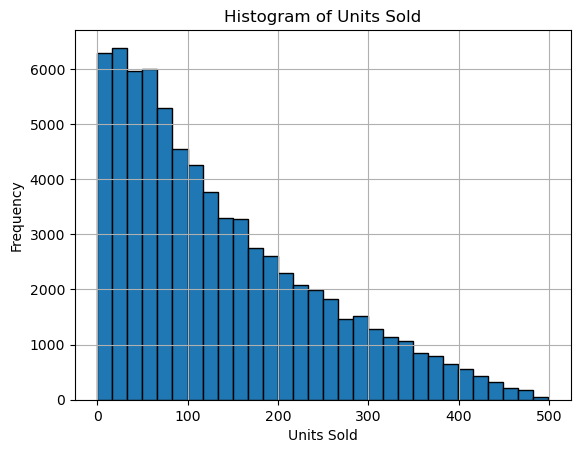

Skewness: 0.9053326253493985


In [11]:
import matplotlib.pyplot as plt

# Plot histogram for 'Units Sold'
df['Units Sold'].hist(bins=30, edgecolor='black')
plt.title('Histogram of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()


# For a particular column
skewness = df['Units Sold'].skew()
print(f"Skewness: {skewness}")

#

#

#

# Model Building

##### Libraries needed for model building

In [12]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

##### Lagging

In [13]:
df['lag_1'] = df['Units Sold'].shift(1)  # Previous day's sales
df['lag_7'] = df['Units Sold'].shift(7)  # Sales from 7 days ago

##### Rolling

In [14]:
df['rolling_mean_7'] = df['Units Sold'].rolling(window=7).mean()  # 7-day rolling mean

##### Date Extract

In [15]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)  # Weekend flag

In [16]:
# Assuming 'Category' is an ordinal feature
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

In [17]:
# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=['Store ID', 'Product ID', 'Region', 'Weather Condition','Category','Seasonality'])

In [18]:
# Add a new column for price difference
df['Price_Difference'] = df['Price'] - df['Competitor Pricing']

In [19]:
# Define the features and target
X = df.drop(columns=['Units Sold','Date','Units Ordered','Demand Forecast']) 
y = df['Units Sold']

In [20]:
# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [21]:
df.dtypes

Date                        datetime64[ns]
Inventory Level                      int64
Units Sold                           int64
Units Ordered                        int64
Demand Forecast                    float64
Price                              float64
Discount                             int64
Holiday/Promotion                    int64
Competitor Pricing                 float64
lag_1                              float64
lag_7                              float64
rolling_mean_7                     float64
Day                                  int32
Month                                int32
DayOfWeek                            int32
IsWeekend                            int64
Store ID_S001                         bool
Store ID_S002                         bool
Store ID_S003                         bool
Store ID_S004                         bool
Store ID_S005                         bool
Product ID_P0001                      bool
Product ID_P0002                      bool
Product ID_

In [22]:
# Initialize the model
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Regression task
    eval_metric='rmse',            # RMSE evaluation metric
    n_estimators=100,              # Number of boosting rounds
    max_depth=6,                   # Depth of the trees
    learning_rate=0.1,             # Learning rate
    random_state=42                # For reproducibility
)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 80.38910363865814
MAE: 62.14791652696403


In [23]:
threshold = 200

y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report, auc
import matplotlib.pyplot as plt

threshold = 200

y_test_class = (y_test > threshold).astype(int)
y_pred_class = (y_pred > threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))

Confusion Matrix:
[[9874 1029]
 [1758 1959]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     10903
           1       0.66      0.53      0.58      3717

    accuracy                           0.81     14620
   macro avg       0.75      0.72      0.73     14620
weighted avg       0.80      0.81      0.80     14620



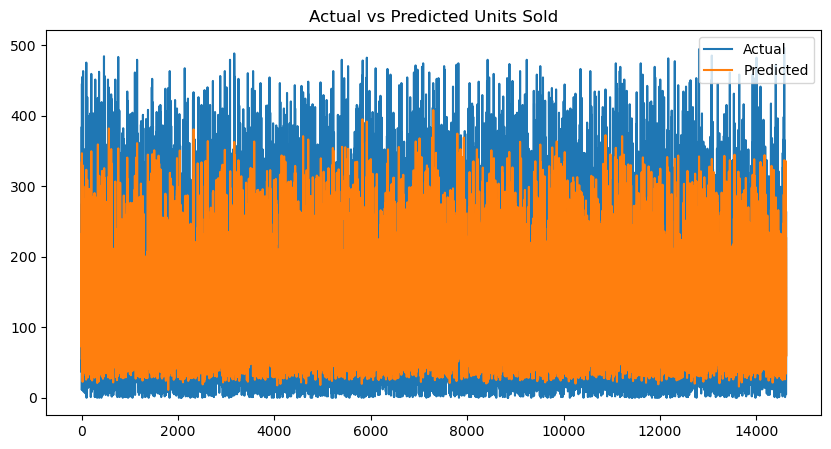

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Units Sold")
plt.show()

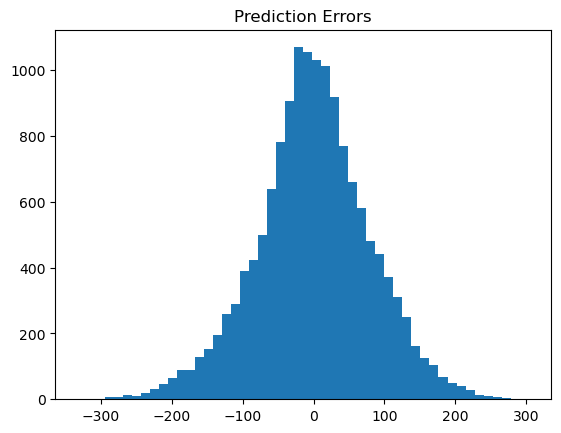

In [26]:
errors = y_test.values - y_pred
plt.hist(errors, bins=50)
plt.title("Prediction Errors")
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

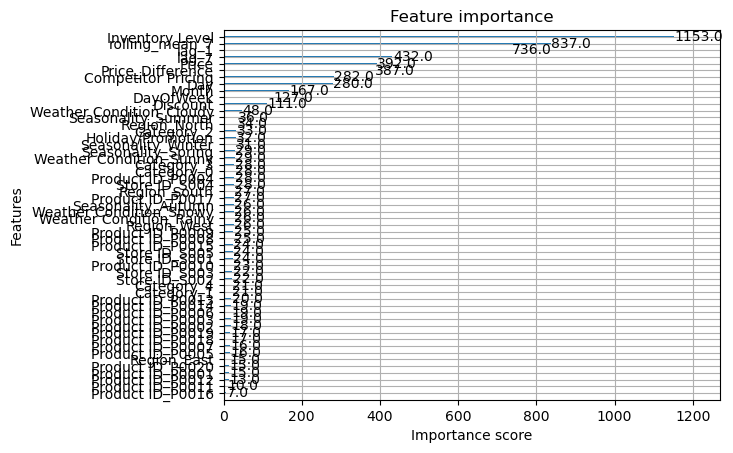

In [27]:
import xgboost as xgb
xgb.plot_importance(model)

In [31]:
model.save_model("xgb_model.json")  # or use .bin